# Ch 1

In [1]:
from operator import itemgetter

import ch1
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

## 1.3

In [2]:
# .2
ch1.avg_method_1??

Signature: ch1.avg_method_1(seed: int = 0)
Docstring: <no docstring>
Source:   
def avg_method_1(seed: int = 0):
    rng = np.random.default_rng(seed=seed)
    rewards = []

    for n in range(1, 11):
        reward = rng.random()
        rewards.append(reward)
        Q = sum(rewards) / n
        print(Q)
File:      /workspace/src/ch1.py
Type:      function


In [3]:
ch1.avg_method_1()

0.6369616873214543
0.4533742005426623
0.31590730834050645
0.2410623901375121
0.3555039599500642
0.4483792295046738
0.4709873075421746
0.5033009642224026
0.5077814116938493
0.5505105129032412


In [4]:
ch1.avg_method_2??

Signature: ch1.avg_method_2(seed: int = 0)
Docstring: <no docstring>
Source:   
def avg_method_2(seed: int = 0):
    rng = np.random.default_rng(seed=seed)
    Q = 0
    for n in range(1, 11):
        reward = rng.random()
        Q += (reward - Q) / n
        print(Q)
File:      /workspace/src/ch1.py
Type:      function


In [5]:
ch1.avg_method_2()

0.6369616873214543
0.4533742005426623
0.3159073083405064
0.24106239013751207
0.3555039599500641
0.44837922950467374
0.4709873075421746
0.5033009642224026
0.5077814116938493
0.5505105129032412


## 1.4

In [6]:
# .1
ch1.Bandit??

Init signature: ch1.Bandit(arms: int = 10, seed: int = 0)
Source:        
class Bandit:
    """simple bandit"""

    def __init__(self, arms: int = 10, seed: int = 0):
        self.rng = np.random.default_rng(seed=seed)
        self.rates = self.rng.random(arms)

    def play(self, arm: int) -> int:
        rate = self.rates[arm]
        return int(rate > self.rng.random())
File:           /workspace/src/ch1.py
Type:           type
Subclasses:     


In [7]:
bandit = ch1.Bandit(seed=0)
for i in range(3):
    ic(bandit.play(0))

ic| bandit.play(0): 0
ic| bandit.play(0): 1
ic| bandit.play(0): 0


In [8]:
# .2
ch1.Agent??

Init signature: ch1.Agent(epsilon: float, action_size: int = 10, seed: int = 0)
Source:        
class Agent:
    """epsilon-greedy agent"""

    def __init__(self, epsilon: float, action_size: int = 10, seed: int = 0):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        self.rng = np.random.default_rng(seed)

    def update(self, action: int, reward: float):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self) -> int:
        if self.rng.random() < self.epsilon:
            return self.rng.integers(0, len(self.Qs))
        return cast(int, np.argmax(self.Qs))
File:           /workspace/src/ch1.py
Type:           type
Subclasses:     


In [9]:
# .3
def run_experiment(seed_bandit, seed_agent, epsilon=0.1, steps=1000, verbose=False):
    bandit = ch1.Bandit(seed=seed_bandit)
    agent = ch1.Agent(seed=seed_agent, epsilon=epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(1, steps + 1):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)

        total_reward += reward
        total_rewards.append(total_reward)

        rate = total_reward / step
        rates.append(total_reward / step)

        if verbose and (step % 500 == 0):
            ic(step)
            ic(total_reward)
            ic(rate)
    return rates, total_rewards

ic| step: 500
ic| total_reward: 457
ic| rate: 0.914
ic| step: 1000
ic| total_reward: 913
ic| rate: 0.913
ic| total_rewards[-1]: 913


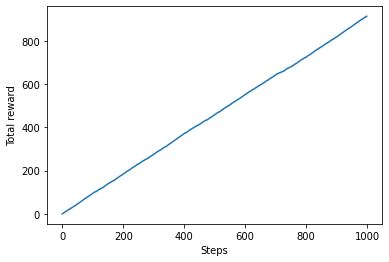

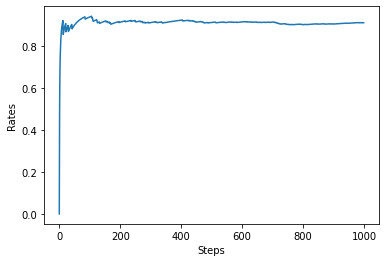

In [10]:
rates, total_rewards = run_experiment(seed_agent=3, seed_bandit=10, verbose=True)
ic(total_rewards[-1])

plt.plot(total_rewards)
plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.show()
plt.clf()

plt.plot(rates)
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.show()

In [11]:
# .4
seeds = range(10)
run_outputs = list(tqdm(map(lambda s: run_experiment(s, s), seeds)))

all_rates = np.array(list(map(itemgetter(0), run_outputs)))
all_total_rewards = np.array(list(map(itemgetter(1), run_outputs)))

ic(all_rates.shape)
_ = ic(all_total_rewards.shape)

0it [00:00, ?it/s]

ic| all_rates.shape: (10, 1000)
ic| all_total_rewards.shape: (10, 1000)


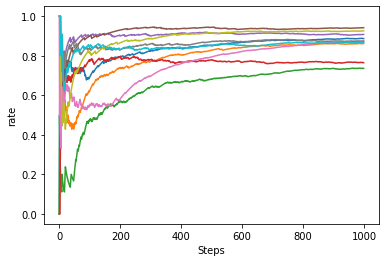

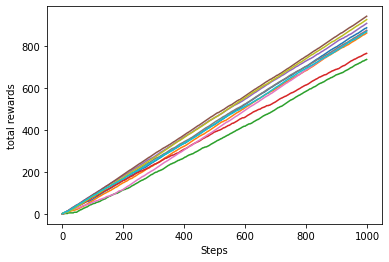

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(all_rates.T)
plt.ylabel("rate")
plt.xlabel("Steps")
plt.show()
plt.clf()

plt.plot(all_total_rewards.T)
plt.ylabel("total rewards")
plt.xlabel("Steps")
plt.show()
plt.clf()

In [13]:
# .4
seeds = range(200)
run_outputs = list(tqdm(map(lambda s: run_experiment(s, s), seeds)))

all_rates = np.array(list(map(itemgetter(0), run_outputs)))

ic(all_rates.shape)

avg_rate = np.average(all_rates, axis=0)

0it [00:00, ?it/s]

ic| all_rates.shape: (200, 1000)


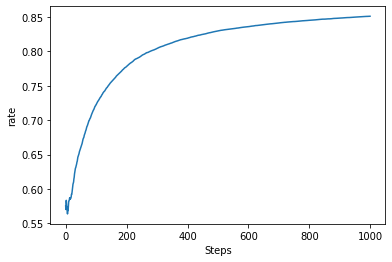

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(avg_rate)
plt.ylabel("rate")
plt.xlabel("Steps")
plt.show()
plt.clf()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

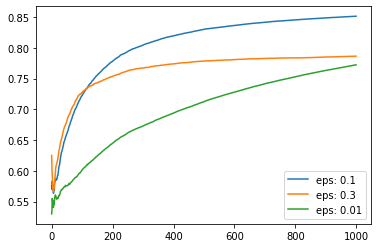

In [15]:
# change epsilon
seeds = range(200)

fig, ax = plt.subplots(1, 1)

for eps in [0.1, 0.3, 0.01]:
    run_outputs = list(tqdm(map(lambda s: run_experiment(s, s, epsilon=eps), seeds)))
    avg_rate = np.average(np.array(list(map(itemgetter(0), run_outputs))), axis=0)
    ax.plot(avg_rate, label=f"eps: {eps}")

plt.legend()
plt.show()

## 1.5

In [16]:
def run_experiment_nonstat(seed_bandit, agent, steps=1000, verbose=False):
    bandit = ch1.NonStatBandit(seed=seed_bandit)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(1, steps + 1):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)

        total_reward += reward
        total_rewards.append(total_reward)

        rate = total_reward / step
        rates.append(total_reward / step)

        if verbose and (step % 500 == 0):
            ic(step)
            ic(total_reward)
            ic(rate)
    return rates, total_rewards

In [17]:
alpha = 0.8
eps = 0.1
run_exp_agent_vanilla = lambda s: run_experiment_nonstat(
    s, ch1.Agent(epsilon=eps, seed=s)
)
run_exp_agent_alpha = lambda s: run_experiment_nonstat(
    s, ch1.AlphaAgent(epsilon=eps, alpha=alpha, seed=s)
)

In [18]:
seeds = range(200)

run_outputs_vanilla = list(tqdm(map(run_exp_agent_vanilla, seeds)))
run_outputs_alpha = list(tqdm(map(run_exp_agent_alpha, seeds)))

all_rates_vanilla = np.array(list(map(itemgetter(0), run_outputs_vanilla)))
all_rates_alpha = np.array(list(map(itemgetter(0), run_outputs_alpha)))

avg_rate_vanilla = np.average(all_rates_vanilla, axis=0)
avg_rate_alpha = np.average(all_rates_alpha, axis=0)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

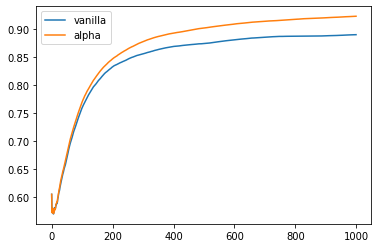

In [19]:
# vanilla vs alpha agent
fig, ax = plt.subplots(1, 1)
ax.plot(avg_rate_vanilla, label="vanilla")
ax.plot(avg_rate_alpha, label="alpha")
plt.legend()
plt.show()